### Chapter 3

In [48]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [ ]:
# P(vampire|positive) = P(postitive|vampire)P(vampire) / P(positive)

In [49]:
# code 3.2
p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

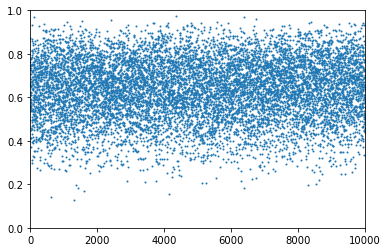

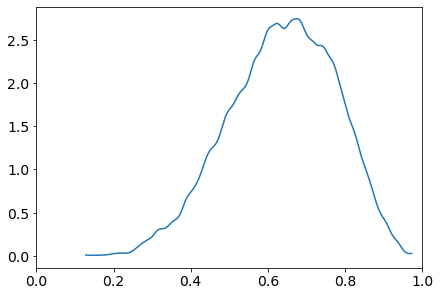

In [50]:
# code 3.3 - 3.5
nsamples = int(1e4)
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)
plt.scatter(np.arange(nsamples), samples, s=1)
plt.ylim([0,1])
plt.xlim([0,nsamples])
plt.show()

az.plot_kde(samples)
plt.xlim([0,1]);

In [51]:
# code 3.6
np.sum(posterior[p_grid<0.5])

0.17187458902022873

In [52]:
# code 3.7
np.sum(samples < 0.5) / nsamples

0.1732

In [53]:
# code 3.8
np.sum([(samples > 0.5) & (samples < 0.75)]) / nsamples

0.6041

In [54]:
# code 3.9
np.quantile(samples, 0.8)

0.7607607607607607

In [55]:
# code 3.10
np.quantile(samples, (0.1, 0.9))

array([0.44934935, 0.81081081])

In [56]:
# code 3.11
p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(3, n=3, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)

In [57]:
# code 3.12
np.quantile(samples, (0.25, 0.75))

array([0.7037037 , 0.93093093])

In [58]:
# code 3.13
az.hdi(samples, hdi_prob=0.5)

array([0.83983984, 1.        ])

In [59]:
# code 3.14
p_grid[np.argmax(posterior)]

1.0

In [60]:
# code 3.15
stats.mode(samples)[0][0]

0.97997997997998

In [61]:
# code 3.16
print(np.mean(samples), np.median(samples))

0.7986587587587588 0.8398398398398398


In [62]:
# code 3.17
np.sum(posterior * np.abs(0.5 - p_grid))

0.31287518749981214

In [63]:
# code 3.18
loss = [np.sum(posterior*np.abs(d - p_grid)) for d in p_grid] 

In [64]:
# code 3.19
p_grid[np.argmin(loss)]

0.8408408408408409

In [65]:
# code 3.20-22
prob_data = stats.binom.pmf(range(3), n=2, p=0.7)
print(prob_data)

print(stats.binom.rvs(n=2, p=0.7, size=1))

print(stats.binom.rvs(n=2, p=0.7, size=10))

[0.09 0.42 0.49]
[1]
[2 1 1 2 2 0 1 2 2 1]


In [66]:
# code 3.23
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[np.sum(dummy_w==i)/1e5 for i in range(3)]

[0.09019, 0.41943, 0.49038]

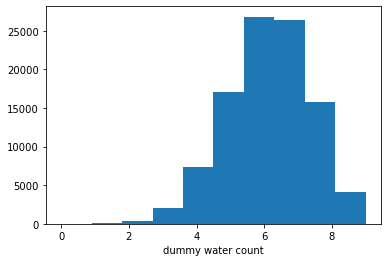

In [72]:
# code 3.24
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
plt.hist(dummy_w)
plt.xlabel("dummy water count");

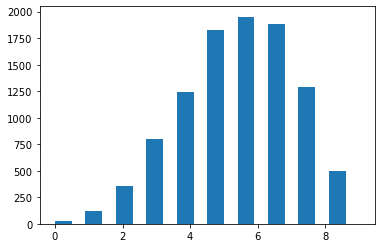

In [79]:
# code 3.26
p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)


w = stats.binom.rvs(n=9, p=samples, size=int(1e4))
plt.hist(w, width=0.5)
plt.show()


# Practice

In [80]:
nsamples = int(1e4)

p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)

In [82]:
# 3E1
np.sum(samples<0.2) / nsamples

0.0004

In [83]:
# 3E2
np.sum(samples>0.8) / nsamples

0.1228

In [85]:
# 3E3
np.sum((samples>0.2) & (samples<0.8)) / nsamples

0.8768

In [86]:
# 3E4
np.quantile(samples, 0.2)

0.5195195195195195

In [88]:
# 3E5
np.quantile(samples, 0.8)

0.7617617617617618

In [89]:
# 3E6
az.hdi(samples, hdi_prob=0.66)

array([0.51751752, 0.78678679])

In [91]:
# 3E7
np.quantile(samples, (0.17, 0.83))

array([0.5015015 , 0.77577578])

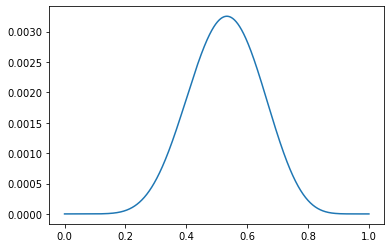

In [152]:
# 3M1
nsamples = int(1e4)

p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(8, n=15, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

plt.plot(p_grid, posterior);

In [153]:
# 3M2
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)
az.hdi(samples, hdi_prob=0.9)

array([0.33933934, 0.72572573])

0.1429

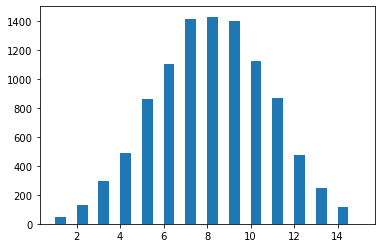

In [106]:
# 3M3
w = stats.binom.rvs(n=15, p=samples, size=int(1e4))
plt.hist(w, width=0.5, bins=range(1,16));
np.sum(w==8) / int(1e4)

In [120]:
# 3M4.
# Use samples from posterior obtained above
w = stats.binom.rvs(n=9, p=samples, size=int(1e4))
print(np.sum(w==6) / 1e4)

0.1782


In [135]:
# 3M6
# az.hdi(samples, hdi_prob=0.99) needs to be 0.05 wide. Easiest for p=0 and p=1 ground truth.
for nsamples in range(1, int(1e4), 100):
    p_grid = np.linspace(0, 1, 1000)
    prob_p = np.linspace(1, 1, 1000)
    prob_data = stats.binom.pmf(0, n=nsamples, p=p_grid)
    posterior = prob_data * prob_p
    posterior = posterior / np.sum(posterior)
    samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

    hdi = az.hdi(samples, hdi_prob=0.99)

    if (hdi[1] - hdi[0]) < 0.05:  # stop if difference in less than 0.05
        print("We need ", nsamples, "samples, yielding an hdi of ", hdi)
        break

We need  101 samples, yielding an hdi of  [0.         0.04204204]


In [157]:
# Hard
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

print(np.sum(birth1), len(birth1), np.sum(birth2), len(birth2))

51 100 60 100


0.5545545545545546

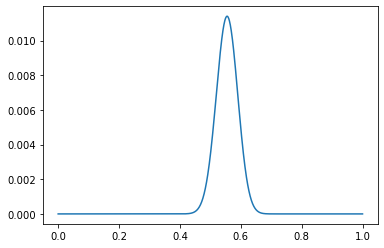

In [158]:
# 3H1
p_grid = np.linspace(0, 1, 1000)
prob_p = np.linspace(1, 1, 1000)
prob_data = stats.binom.pmf(111, n=200, p=p_grid)
posterior = prob_data * prob_p
posterior = posterior / np.sum(posterior)

plt.plot(p_grid, posterior);

p_grid[np.argmax(posterior)]

In [159]:
# 3H2
samples = np.random.choice(p_grid, p=posterior, size=nsamples, replace=True)
print(az.hdi(samples, hdi_prob=0.5))
print(az.hdi(samples, hdi_prob=0.89))
print(az.hdi(samples, hdi_prob=0.97))

[0.52652653 0.57357357]
[0.5005005  0.61161161]
[0.47747748 0.62762763]


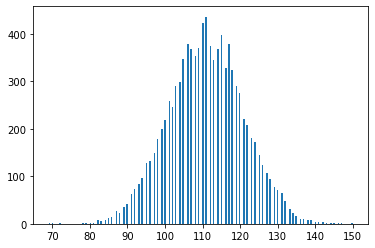

In [163]:
# 3H3
s = stats.binom.rvs(n=200, p=samples, size=10000)
plt.hist(s, bins = 200);

51


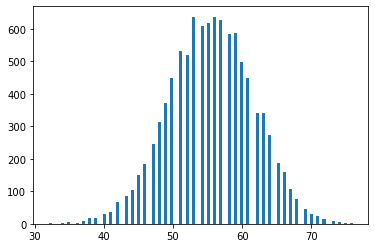

In [164]:
# 3H4
s = stats.binom.rvs(n=100, p=samples, size=10000)
plt.hist(s, bins = 100);
print(np.sum(birth1==1))

In data: 39


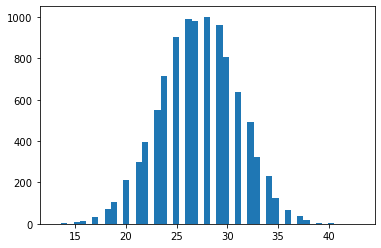

In [173]:
# 3H5
first_girls = np.sum(birth1==0)
s = stats.binom.rvs(n=first_girls, p=samples, size=10000)
plt.hist(s, bins=first_girls);

print("In data:", np.sum(birth2[birth1==0]==1))

# Thus, we are underestimating the amount of boys following girls.